### Imports

In [1]:
import pandas as pd 
import seaborn as sns 
import random
import math

### Generate test data

In [33]:
#This function generates test data for stars with ra, dec and magnitude for "plate" data and "gaia" data

#random.seed(1)
n = 1000 #number of stars
i = 0
dt = [] #ideal
dt1 = [] #plate(apt)
dt2 = [] #"truth" (gaia)
er = 0.1 #deviation from "ideal" data

#for same number of stars
while i < n:
    dt.append([round(random.uniform(1,10), 2),round(random.uniform(1,10), 2),round(random.uniform(5,15), 2)])
    dt1.append([(dt[i][0]-round(random.uniform(-er,er), 2)), (dt[i][1]-round(random.uniform(-er,er), 2)), \
                (dt[i][2]-round(random.uniform(-er,er), 2))])
    dt2.append([(dt[i][0]-round(random.uniform(-er,er), 2)), (dt[i][1]-round(random.uniform(-er,er), 2)), \
                (dt[i][2]-round(random.uniform(-er,er), 2))])
    i+=1

df_apt = pd.DataFrame(dt1, columns = ['CentroidRA', 'CentroidDec', 'magnitude'])
df_gaia = pd.DataFrame(dt2, columns = ['ra', 'dec','phot_bp_mean_mag']) 

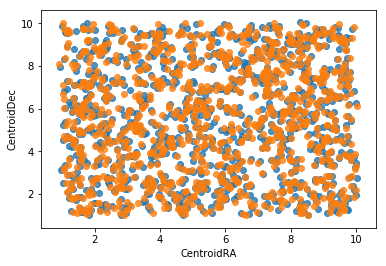

In [34]:
sns.regplot('ra','dec',data=df_gaia, fit_reg = False)
sns.regplot('CentroidRA', 'CentroidDec',data=df_apt, fit_reg = False)

### Combined data
- Combine data based on similarities between ra&dec
- Create new combined data
- Delete overlapping terms

In [41]:
maxdiff = 0.5 

df = pd.DataFrame(columns=['ra','dec','phot_bp_mean_mag','CentroidRA','CentroidDec','magnitude','diff'])

m = 0
while m<1000:
    #print("m = ",m)
    n = 0
    while n<1000:
        #print("n = ",n)
        if (df_apt['CentroidRA'][n]-df_gaia['ra'][m])**2+(df_apt['CentroidDec'][n]-df_gaia['dec'][m])**2 < maxdiff**2:
            #print("yes!",n)
            df = df.append({'ra': df_gaia['ra'][m], 'dec': df_gaia['dec'][m], \
                            'phot_bp_mean_mag': df_gaia['phot_bp_mean_mag'][m],\
                            'CentroidRA':df_apt['CentroidRA'][n], 'CentroidDec':df_apt['CentroidDec'][n],\
                            'magnitude': df_apt['magnitude'][n], \
                            'diff' : math.sqrt((df_apt['CentroidRA'][n]-df_gaia['ra'][m])**2+\
                                               (df_apt['CentroidDec'][n]-df_gaia['dec'][m])**2),\
                            'Δra': df_gaia['ra'][m] - df_apt['CentroidRA'][n],\
                           'Δdec': df_gaia['dec'][m] - df_apt['CentroidDec'][n]},\
            ignore_index=True)
        n+=1
    m+=1

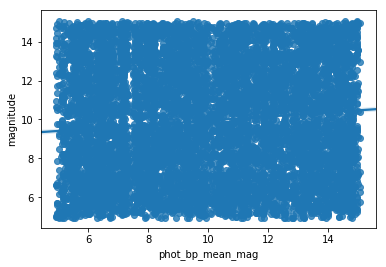

In [42]:
sns.regplot('phot_bp_mean_mag','magnitude',data=df)

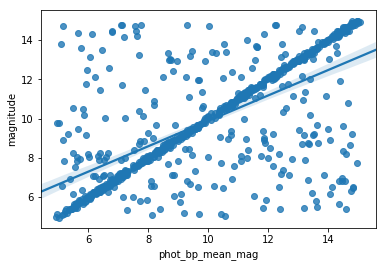

In [43]:
#drop duplicates
df = df.sort_values('diff').drop_duplicates('ra')
sns.regplot('phot_bp_mean_mag','magnitude',data=df)

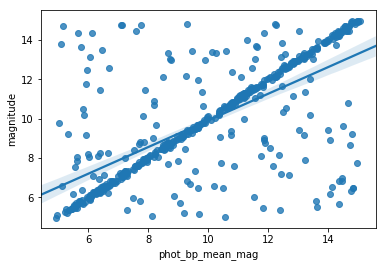

In [44]:
df = df.sort_values('diff').drop_duplicates('CentroidRA')
sns.regplot('phot_bp_mean_mag','magnitude',data=df)

/Users/Lyy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


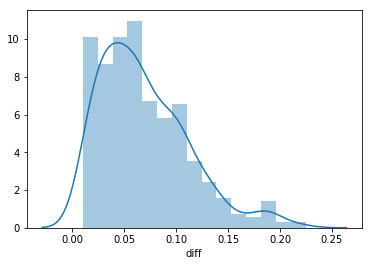

In [45]:
sns.distplot(df['diff'])

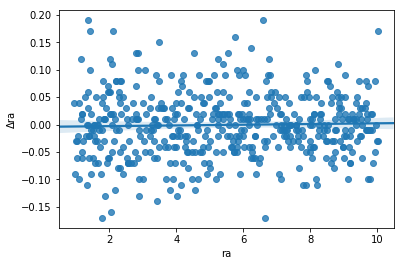

In [48]:
sns.regplot('ra','Δra',data=df)

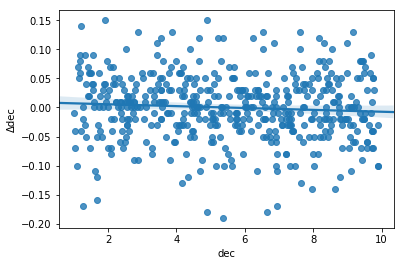

In [47]:
sns.regplot('dec','Δdec',data=df)